In [2]:
import sys
sys.path.append("/miniconda3/lib/python3.7/site-packages")

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.special import jv
from matplotlib.colors import LogNorm
import os

In [4]:
def tiff_reader(filename: str, debug = False) -> np.array:
    
    # Read in TIFF image
    img = Image.open(filename)
    
    #Convert to NumPy array
    img = np.array(img)
    
    if(debug):
        print("Sucessfully Read in Image located at: {}".format(filename))
        print("Data Type of Image: {}".format(type(img)))
        print("Data Type of Pixel Value: {}".format(type(img[0,0])))
        print("First Pixel Value: {}".format(img[0,0]))
        print("Image Size: {}".format(img.size))
        print("Image Dimensions: {} x {}".format(*img.shape))
        print("Reformating Data...........")
    
    # Converting from RBG to Mono
    #img = img[:,:,0]
    
    # Convert to floating point
    img = img.astype(np.float64)
    
    if(debug):
        print("Reformating Complete")
        print("New Data Type of Image: {}".format(type(img)))
        print("New Data Type of Pixel Value: {}".format(type(img[0,0])))
        print("First Pixel Value: {}".format(img[0,0]))
        
    return img

In [5]:
raw2104_0 = "et2000_g10_ne4000000.tiff"
raw2104_1 = "et2000_g10_ne4000001.tiff"
raw2104_2 = "et2000_g10_ne4000002.tiff"
raw2104_3 = "et2000_g10_ne4000003.tiff"

raw2124_0 = "et2000_g12_ne4000000.tiff"
raw2124_1 = "et2000_g12_ne4000001.tiff"

raw2144_0 = "et2000_g14_ne4000000.tiff"
raw2144_1 = "et2000_g14_ne4000001.tiff"

raw2164_0 = "et2000_g16_ne4000000.tiff"
raw2164_1 = "et2000_g16_ne4000001.tiff"

raw5104_0 = "et5000_g10_ne4000000.tiff"
raw5104_1 = "et5000_g10_ne4000001.tiff"

raw5124_0 = "et5000_g12_ne4000000.tiff"
raw5124_1 = "et5000_g12_ne4000001.tiff"

raw5144_0 = "et5000_g14_ne4000000.tiff"
raw5144_1 = "et5000_g14_ne4000001.tiff"

raw1122_0 = "xray_1000ms_12gain00000.tiff"
raw1122_1 = "xray_1000ms_12gain00001.tiff"

raw5122_0 = "xray_5000ms_12gain00001.tiff"
raw5122_1 = "xray_5000ms_12gain00001.tiff"

rawd1122_0 = "dark_1000ms_12gain00000.tiff"
rawd1122_1 = "dark_1000ms_12gain00001.tiff"

rawd5122_0 = "dark_5000ms_12gain00001.tiff"
rawd5122_1 = "dark_5000ms_12gain00001.tiff"

In [7]:
img5124_0 = tiff_reader(raw5124_0, debug = True)
img5124_1 = tiff_reader(raw5124_1, debug = True)
sub5124_1 = img5124_1-img5124_0

Sucessfully Read in Image located at: et5000_g12_ne4000000.tiff
Data Type of Image: <class 'numpy.ndarray'>
Data Type of Pixel Value: <class 'numpy.uint8'>
First Pixel Value: 244
Image Size: 1241632
Image Dimensions: 964 x 1288
Reformating Data...........
Reformating Complete
New Data Type of Image: <class 'numpy.ndarray'>
New Data Type of Pixel Value: <class 'numpy.float64'>
First Pixel Value: 244.0
Sucessfully Read in Image located at: et5000_g12_ne4000001.tiff
Data Type of Image: <class 'numpy.ndarray'>
Data Type of Pixel Value: <class 'numpy.uint8'>
First Pixel Value: 254
Image Size: 1241632
Image Dimensions: 964 x 1288
Reformating Data...........
Reformating Complete
New Data Type of Image: <class 'numpy.ndarray'>
New Data Type of Pixel Value: <class 'numpy.float64'>
First Pixel Value: 254.0


In [9]:
img2104_0 = tiff_reader(raw2104_0, debug = True)
img2104_1 = tiff_reader(raw2104_1, debug = True)
img2104_2 = tiff_reader(raw2104_2, debug = True)
img2104_3 = tiff_reader(raw2104_3, debug = True)

sub2104_1 = img2104_1-img2104_0
sub2104_3 = img2104_3-img2104_2

Sucessfully Read in Image located at: et2000_g10_ne4000000.tiff
Data Type of Image: <class 'numpy.ndarray'>
Data Type of Pixel Value: <class 'numpy.uint8'>
First Pixel Value: 215
Image Size: 1241632
Image Dimensions: 964 x 1288
Reformating Data...........
Reformating Complete
New Data Type of Image: <class 'numpy.ndarray'>
New Data Type of Pixel Value: <class 'numpy.float64'>
First Pixel Value: 215.0
Sucessfully Read in Image located at: et2000_g10_ne4000001.tiff
Data Type of Image: <class 'numpy.ndarray'>
Data Type of Pixel Value: <class 'numpy.uint8'>
First Pixel Value: 219
Image Size: 1241632
Image Dimensions: 964 x 1288
Reformating Data...........
Reformating Complete
New Data Type of Image: <class 'numpy.ndarray'>
New Data Type of Pixel Value: <class 'numpy.float64'>
First Pixel Value: 219.0
Sucessfully Read in Image located at: et2000_g10_ne4000002.tiff
Data Type of Image: <class 'numpy.ndarray'>
Data Type of Pixel Value: <class 'numpy.uint8'>
First Pixel Value: 223
Image Size: 1

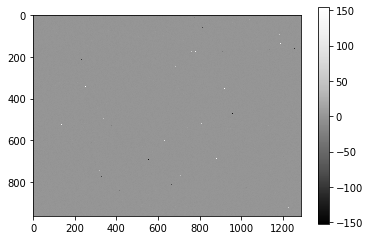

In [10]:
# Turn on interactive plotting
plt.ion()
# Plot difference image in grayscale
plt.imshow(sub2104_3,interpolation="none",cmap='Greys_r')
cbar = plt.colorbar()

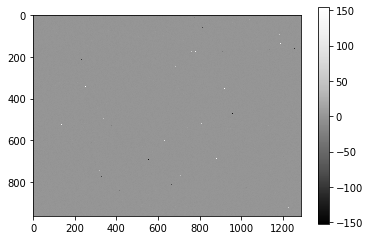

In [14]:
# Turn on interactive plotting
plt.ion()
# Plot difference image in grayscale
plt.imshow(sub2104_3,interpolation="none",cmap='Greys_r')
cbar = plt.colorbar()

In [24]:
firstrow=sub2104_3[0]
np.shape(firstrow)

array([ 4., -3., 84., ...,  0.,  0.,  1.])

In [31]:
Cut_list = [i for i in firstrow if i>50]

In [32]:
Cut_list

[84.0, 97.0]

In [8]:
plt.figure(figsize = (8,6))

subarray = sub5124_1[:,:]
#subarray = gridz[RESOLUTION//2-10:RESOLUTION//2+10,RESOLUTION//2-10:RESOLUTION//2+10]

plt.hist(subarray.flatten(), 
         bins = 'scott',
         density = True,
         histtype = 'step',
         color = 'r')
plt.tight_layout()
plt.grid(alpha=0.5)
plt.yscale('log')
plt.xlim(np.min(sub5124_1),np.max(sub5124_1)
plt.title("Histogram of subtracted image", size=18)
plt.xlabel("Intensity  [arb]", size=16)
plt.ylabel("Probability Density", size=16)
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-a401f15385ac>, line 15)

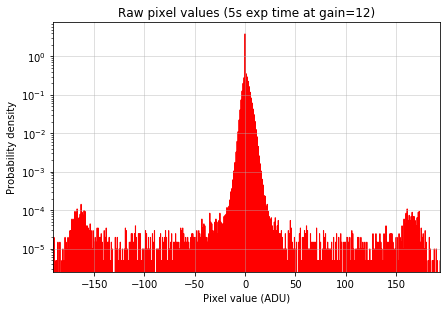

In [15]:
#plt.figure(figsize=(8,6))
subarray=sub5124_1[:,:]
plt.hist(subarray.flatten(),bins='scott',density=True,histtype='step',color='r')
plt.tight_layout()
plt.grid(alpha=.5)
plt.yscale('log')
plt.xlim(np.min(sub5124_1),np.max(sub5124_1))
plt.title("Raw pixel values (5s exp time at gain=12)")
plt.xlabel('Pixel value (ADU)')
plt.ylabel('Probability density')
plt.show()

In [41]:
np.shape(sub2104_3)

(964, 1288)

In [82]:
nozeros = []
for i in range(964):
        for j in range(1288):
            
            if sub2104_3[i][j] > 0:
                nozeros = np.append(nozeros,sub2104_3[i][j])

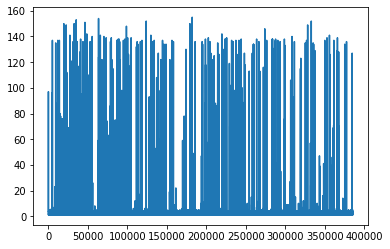

In [83]:
plt.plot(nozeros)

In [122]:
def cln(img: np.ndarray) -> np.ndarray:
    r=964
    c=1288
    thd=50
    clean_img = img.copy()
    
    # Cycle through every pixel and delete them if under the ADC_THRESHOLD
    for i in range(r):
        for j in range(c):
            
            if clean_img[i][j] < thd:
                clean_img[i][j] = 0
    
    # Cycle through each pixel in each row except along the edges
    for i in range(1, r - 1):
        for j in range(1, c - 1):
            
            if clean_img[i][j] != 0:
                
                # Examine every pixel around a non-zero-valued pixel to identify and delete multipixel events
                if clean_img[i - 1][j - 1] != 0 or clean_img[i - 1][j] != 0 \
                or clean_img[i - 1][j + 1] != 0 or clean_img[i][j - 1] != 0 \
                or clean_img[i][j + 1] != 0 or clean_img[i + 1][j - 1] != 0 \
                or clean_img[i + 1][j] != 0 or clean_img[i + 1][j + 1] != 0:
                    clean_img[i][j] = 0
                    clean_img[i - 1][j - 1] = 0
                    clean_img[i - 1][j] = 0
                    clean_img[i - 1][j + 1] = 0
                    clean_img[i][j - 1] = 0
                    clean_img[i][j + 1] = 0
                    clean_img[i + 1][j - 1] = 0
                    clean_img[i + 1][j] = 0
                    clean_img[i + 1][j + 1] = 0
    
    spe = []
    for i in range(964):
        for j in range(1288):
            if clean_img[i,j]>0:
                spe=np.append(nz,z[i,j])
                
    return(spe)
    

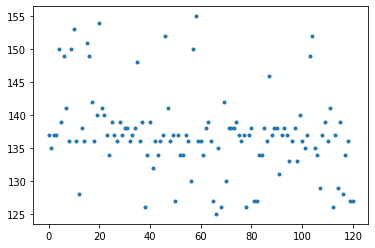

In [123]:
plt.plot(cln(sub2104_3),'.')